# Reading Financial Data

In this example we  use the Pax Financial API to read some historical hourly price data about the Bitcoin/US dollar exchange rate, and we display the hour bars we obtain.

To begin we import the Pax Development Kit and instantiate the Pax Financial API. You must replace the API key in the `PaxFinancialExamples/.config` file with your API key.

In [1]:
import paxdk

import json
with open("../.config") as f:
    data = json.load(f)
api_key = data['api_key']   

pq = paxdk.PaxFinancialAPI(url_version='dev',api_key=api_key) 

PaxFinancialAPI v4 loaded!


We use the `get_historical_hour` call of the Pax Financial API to read some historical hourly price data about the Bitcoin/US dollar exchange rate. We use a Pandas dataframe to display the hour bars we obtain.  Hour bars correspond to a one-hour period and contain the opening price, closing price, high price, and low price for that period.

In [4]:
import pandas as pd
import datetime

bars = pq.get_historical_hour({'api_key':api_key,
                                'time_in':datetime.datetime(2020,4,1,10),
                                'time_end':datetime.datetime(2020,4,2,10),
                                'Ticker':'BTCUSDT',
                              },remote=True)
df=pd.DataFrame(bars)
df[['DateTime','Ticker','OpenPrice','ClosePrice','HighPrice','LowPrice']]

,DateTime,Ticker,OpenPrice,ClosePrice,HighPrice,LowPrice
0,2020-04-01 10:00:00,BTCUSDT,6298.74,6295.03,6318.89,6288.02
1,2020-04-01 11:00:00,BTCUSDT,6295.03,6294.25,6301.76,6271.20
2,2020-04-01 12:00:00,BTCUSDT,6294.25,6217.51,6332.16,6215.66
3,2020-04-01 13:00:00,BTCUSDT,6217.51,6207.82,6237.52,6184.44
4,2020-04-01 14:00:00,BTCUSDT,6207.82,6248.66,6259.88,6200.55
5,2020-04-01 15:00:00,BTCUSDT,6248.66,6230.79,6257.52,6223.01
6,2020-04-01 16:00:00,BTCUSDT,6230.79,6186.38,6232.66,6153.80
7,2020-04-01 17:00:00,BTCUSDT,6186.38,6196.06,6211.07,6170.05
8,2020-04-01 18:00:00,BTCUSDT,6196.06,6187.99,6216.32,6183.59
9,2020-04-01 19:00:00,BTCUSDT,6187.99,6205.43,6211.38,6166.86


With the price data in a dataframe, we can easily plot the data with Matplotlib. For example, we can plot the high and low prices against time:

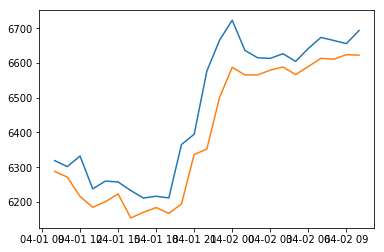

In [6]:
import matplotlib.pyplot as plt
plt.plot(df['DateTime'],df['HighPrice'])
plt.plot(df['DateTime'],df['LowPrice'])
plt.show()